In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 14,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}

plt.rcParams.update(myparams)

from utils import Dataset

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

In [2]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo, list_available_datasets

# Regression

In [130]:
datasets_regression = {
    1: 'Abalone',
    9: 'Auto MPG',
    #10: 'Automobile',
    60: 'Liver Disorders',
    186: 'Wine Quality',
    189: 'Parkinsons Telemonitoring',
    242: 'Energy efficiency',
    275: 'Bike Sharing Dataset',
    #320: 'Student Performance',
    477: 'Real estate valuation',
    519: 'Heart failure clinical records'  
}

---

In [124]:
# ==========================
data = fetch_ucirepo(id=16)
# ==========================
df = data.variables[['name', 'role', 'type']]
target = df[df.role == 'Target'].name.values[0]
columns = df[df.role == 'Feature'][['name', 'type']]
num_columns = columns.loc[(columns.type == 'Continuous') | (columns.type == 'Integer')].name.values
cat_columns = columns[columns.type == 'Categorical'].name.values
columns = columns.name.values
    
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ]
)
    
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('linreg', LinearRegression())
    ]
)

df = data.data.original

if data.metadata.has_missing_values:
    df = df.dropna(ignore_index=True)

X = df.drop(columns=[target])
y = df[target].to_numpy().flatten()
    
dataset = Dataset(X, y)
m, n = X.shape
sample_sizes = np.linspace(n+1, m, 21, dtype=int)[1:]
B = 100

model = pipe
loss = mean_squared_error

loss_means = []
loss_stds = []

for k in tqdm(sample_sizes):
    tmp = []
    for _ in range(B):
        X_k, y_k = dataset.sample(k)
        model.fit(X_k, y_k)
        y_pred = model.predict(X)
        tmp.append(loss(y, y_pred))
    tmp = np.array(tmp)
    loss_means.append(tmp.mean())
    loss_stds.append(tmp.std())

loss_means = np.array(loss_means)
loss_stds = np.array(loss_stds)

  0%|          | 0/20 [00:00<?, ?it/s]


ValueError: could not convert string to float: 'N'

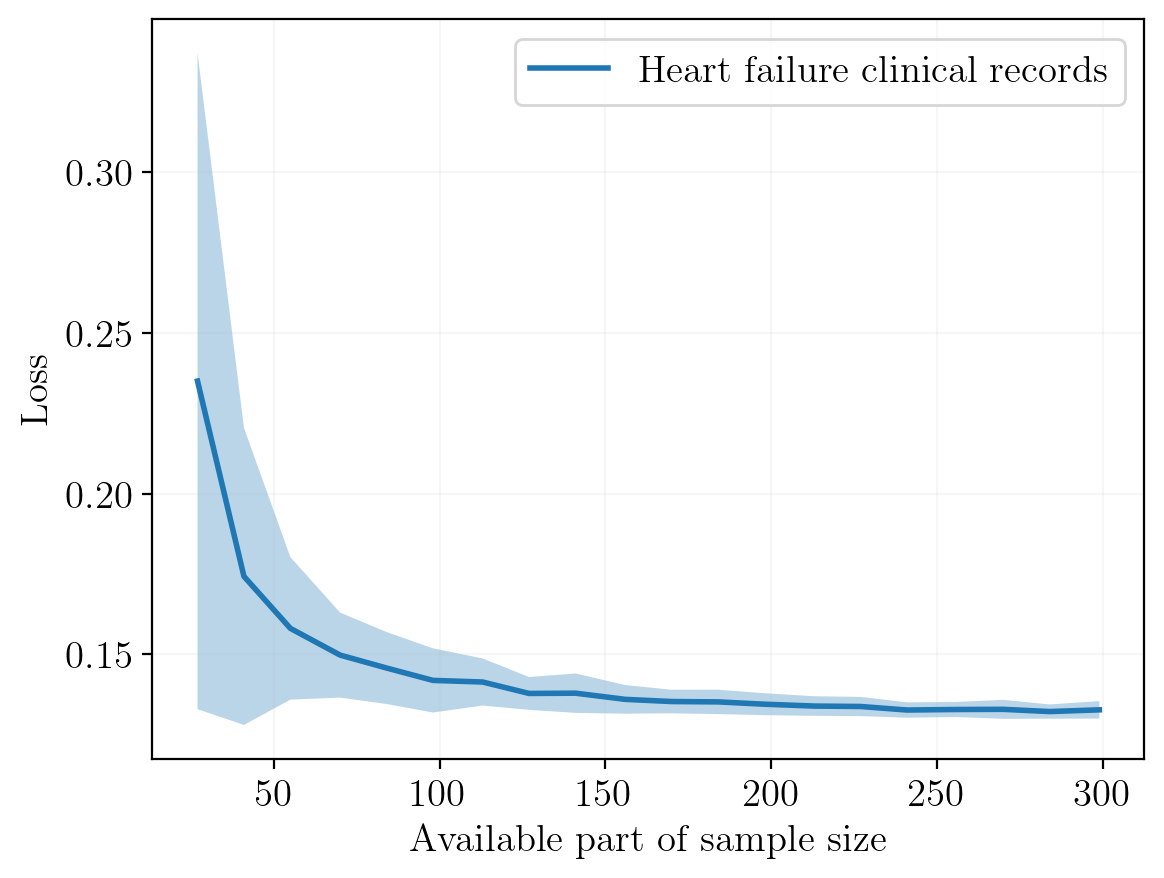

In [120]:
plt.plot(sample_sizes, loss_means, label=data.metadata.name)
plt.fill_between(sample_sizes, loss_means - loss_stds, loss_means + loss_stds, alpha=0.3)
#plt.plot(sample_sizes / max(sample_sizes), loss_means / max(loss_means), label=data.metadata.name)
#plt.fill_between(sample_sizes / max(sample_sizes), (loss_means - loss_stds) / max(loss_means), (loss_means + loss_stds) / max(loss_means), alpha=0.3)
plt.legend()
plt.xlabel("Available part of sample size")
plt.ylabel("Loss")
#plt.xlim(left=55)
#plt.ylim(bottom=0, top=10000)
plt.show()

---

100%|██████████| 11/11 [10:27<00:00, 57.07s/it] 


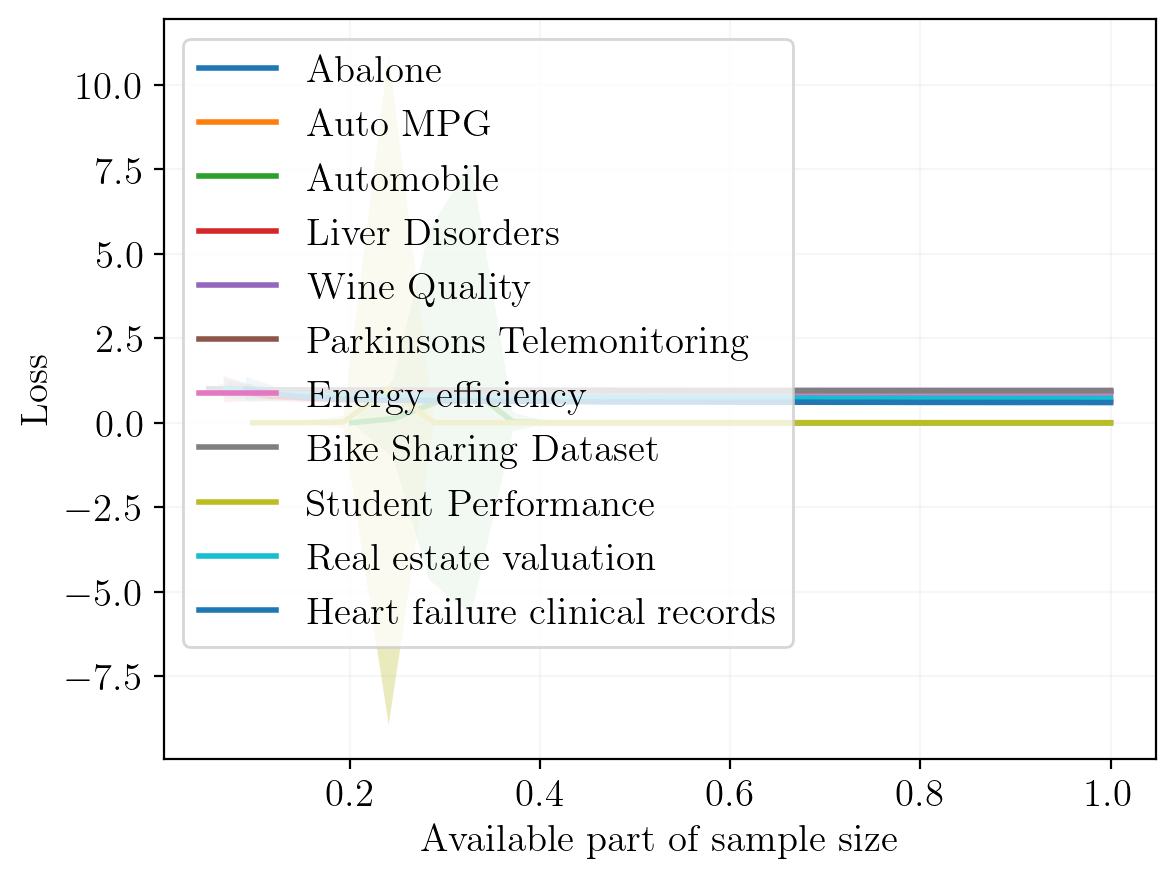

In [128]:
for key in tqdm(datasets_regression.keys()):
    
    # ==========================
    data = fetch_ucirepo(id=key)
    # ==========================
    df = data.variables[['name', 'role', 'type']]
    target = df[df.role == 'Target'].name.values[0]
    columns = df[df.role == 'Feature'][['name', 'type']]
    num_columns = columns.loc[(columns.type == 'Continuous') | (columns.type == 'Integer')].name.values
    cat_columns = columns[columns.type == 'Categorical'].name.values
    columns = columns.name.values
        
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
        ]
    )
        
    pipe = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('linreg', LinearRegression())
        ]
    )

    df = data.data.original

    if data.metadata.has_missing_values:
        df = df.dropna(ignore_index=True)

    X = df.drop(columns=[target])
    y = df[target].to_numpy().flatten()
        
    dataset = Dataset(X, y)
    m, n = X.shape
    sample_sizes = np.linspace(n+1, m, 21, dtype=int)[1:]
    B = 100

    model = pipe
    loss = mean_squared_error

    loss_means = []
    loss_stds = []

    for k in tqdm(sample_sizes):
        tmp = []
        for _ in range(B):
            X_k, y_k = dataset.sample(k)
            model.fit(X_k, y_k)
            y_pred = model.predict(X)
            tmp.append(loss(y, y_pred))
        tmp = np.array(tmp)
        loss_means.append(tmp.mean())
        loss_stds.append(tmp.std())

    loss_means = np.array(loss_means)
    loss_stds = np.array(loss_stds)

    #plt.plot(sample_sizes, loss_means, label=data.metadata.name)
    #plt.fill_between(sample_sizes, loss_means - loss_stds, loss_means + loss_stds, alpha=0.3)
    plt.plot(sample_sizes / max(sample_sizes), loss_means / max(loss_means), label=data.metadata.name)
    plt.fill_between(sample_sizes / max(sample_sizes), (loss_means - loss_stds) / max(loss_means), (loss_means + loss_stds) / max(loss_means), alpha=0.3)

plt.legend()
plt.xlabel("Available part of sample size")
plt.ylabel("Loss")
#plt.xlim(left=55)
#plt.ylim(bottom=0, top=10000)
plt.show()

---

In [49]:
#list_available_datasets()

In [24]:
#for key in datasets_regression.keys():
#    data = fetch_ucirepo(id=key)
#    print(data.metadata.name)

In [50]:
data = fetch_ucirepo(id=1)
data.metadata.name

'Abalone'

In [51]:
df = data.variables[['name', 'role', 'type']]
df

,name,role,type
0,Sex,Feature,Categorical
1,Length,Feature,Continuous
2,Diameter,Feature,Continuous
3,Height,Feature,Continuous
4,Whole_weight,Feature,Continuous
5,Shucked_weight,Feature,Continuous
6,Viscera_weight,Feature,Continuous
7,Shell_weight,Feature,Continuous
8,Rings,Target,Integer


In [52]:
columns = df[df.role == 'Feature'][['name', 'type']]
columns

,name,type
0,Sex,Categorical
1,Length,Continuous
2,Diameter,Continuous
3,Height,Continuous
4,Whole_weight,Continuous
5,Shucked_weight,Continuous
6,Viscera_weight,Continuous
7,Shell_weight,Continuous


In [53]:
num_columns = columns[columns.type == 'Continuous'].name.values
num_columns

array(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'], dtype=object)

In [54]:
cat_columns = columns[columns.type == 'Categorical'].name.values
cat_columns

array(['Sex'], dtype=object)

In [55]:
columns = columns.name.values
columns

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight'], dtype=object)

In [56]:
target = df[df.role == 'Target'].name.values[0]
target

'Rings'

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ]
)

In [58]:
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('linreg', LinearRegression())
    ]
)

In [59]:
X = data.data.features
y = data.data.targets.to_numpy().flatten()

In [60]:
pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  array(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  array(['Sex'], dtype=object))])),
                ('linreg', LinearRegression())])

In [61]:
y_pred = pipe.predict(X)
y_pred

array([ 9.22230616,  7.84925748, 11.09556953, ..., 10.95146983,
        9.73635252, 10.99542774])

In [62]:
y

array([15,  7,  9, ...,  9, 10, 12])

In [99]:
dataset = Dataset(X, y)
m, n = X.shape
sample_sizes = np.arange(n+1, m+1, 100)
B = 100

model = pipe
loss = mean_squared_error

loss_means = []
loss_stds = []

for k in tqdm(sample_sizes):
    tmp = []
    for _ in range(B):
        X_k, y_k = dataset.sample(k)
        model.fit(X_k, y_k)
        y_pred = model.predict(X)
        tmp.append(loss(y, y_pred))
    tmp = np.array(tmp)
    loss_means.append(tmp.mean())
    loss_stds.append(tmp.std())

loss_means = np.array(loss_means)
loss_stds = np.array(loss_stds)

100%|██████████| 42/42 [01:05<00:00,  1.55s/it]


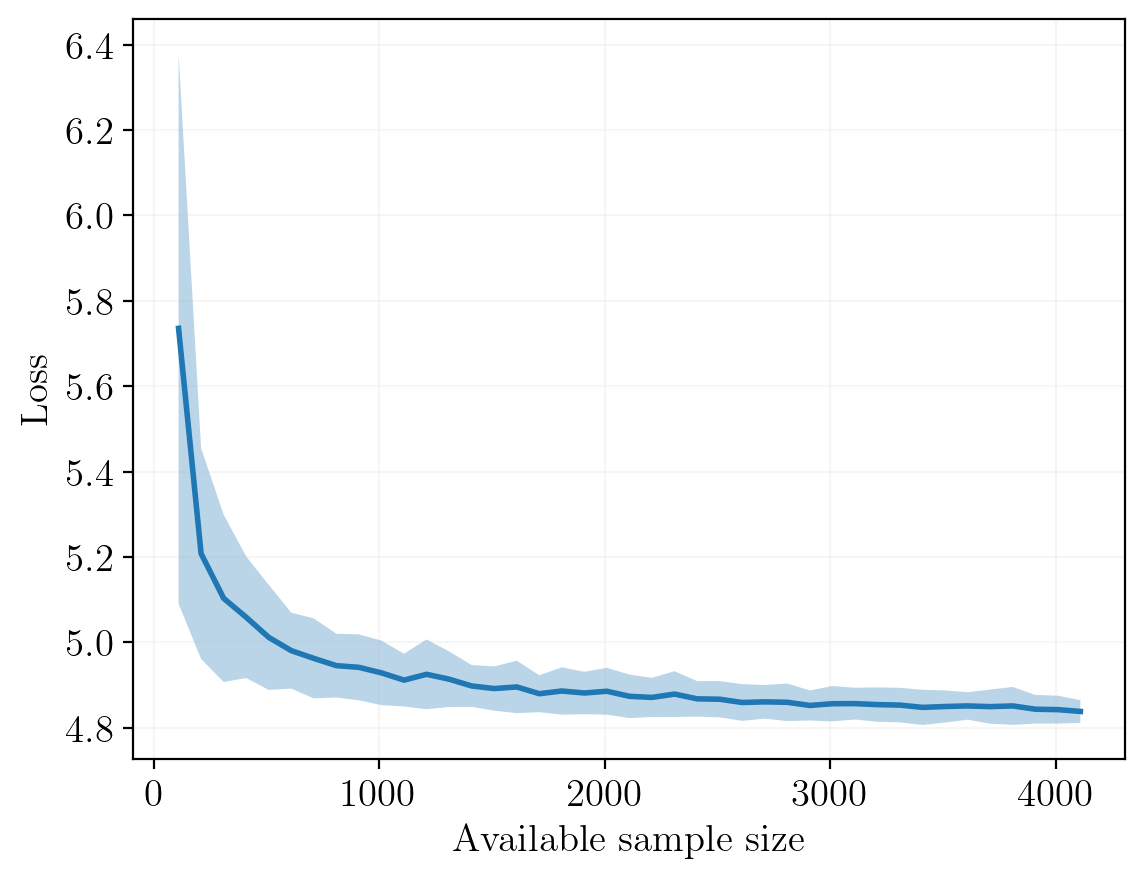

In [104]:
plt.plot(sample_sizes[1:], loss_means[1:])
plt.fill_between(sample_sizes[1:], loss_means[1:] - loss_stds[1:], loss_means[1:] + loss_stds[1:], alpha=0.3)
plt.xlabel("Available sample size")
plt.ylabel("Loss")
plt.show()

# Classification

In [32]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [139]:
target_names = iris.data.targets.squeeze().unique()

In [33]:
from sklearn.svm import SVC
from sklearn import model_selection

In [34]:
model = SVC()

In [48]:
X = X.to_numpy()

In [46]:
y = y.to_numpy().flatten()

In [53]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [65]:
kfold = model_selection.KFold(n_splits=10)
model = SVC(probability=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)

In [66]:
cv_results.mean()

0.9518181818181818

In [67]:
from sklearn.metrics import log_loss

In [69]:
model.fit(X_train, y_train)
y_pred = model.predict_proba(X)

In [76]:
log_loss(y, y_pred)

0.11759142318151485

In [82]:
from utils import Dataset

In [83]:
dataset = Dataset(X, y)

In [85]:
X_m, y_m = dataset.sample(m)

In [88]:
model.fit(X_m, y_m)

SVC(probability=True)

In [168]:
model = SVC(probability=True)
sample_sizes = np.arange(dataset.n+1, dataset.m+1)
B = 1000

loss_means = []
loss_stds = []

for k in tqdm(sample_sizes):
    tmp = []
    tmp_loss = []
    for _ in range(B):
        X_k, y_k = dataset.sample(k)
        model.fit(X_k, y_k)
        y_pred = model.predict_proba(X)
        tmp.append(log_loss(y, y_pred, labels=target_names))
    tmp = np.array(tmp)
    loss_means.append(tmp.mean())
    loss_stds.append(tmp.var())
                     
loss_means = np.array(loss_means)
loss_stds = np.array(loss_stds)

  0%|          | 0/146 [00:00<?, ?it/s]


ValueError: The number of classes in labels is different from that in y_pred. Classes found in labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

In [161]:

train_sizes = np.arange(0.1, 1, 0.1)
losses = []

for m in np.arange(dataset.n+1, dataset.m+1):
    X_m, y_m = dataset.sample(m)
    model.fit(X_m, y_m)
    y_pred = model.predict_proba(X)
    losses.append(log_loss(y, y_pred, labels=target_names))
    
losses = np.array(losses)

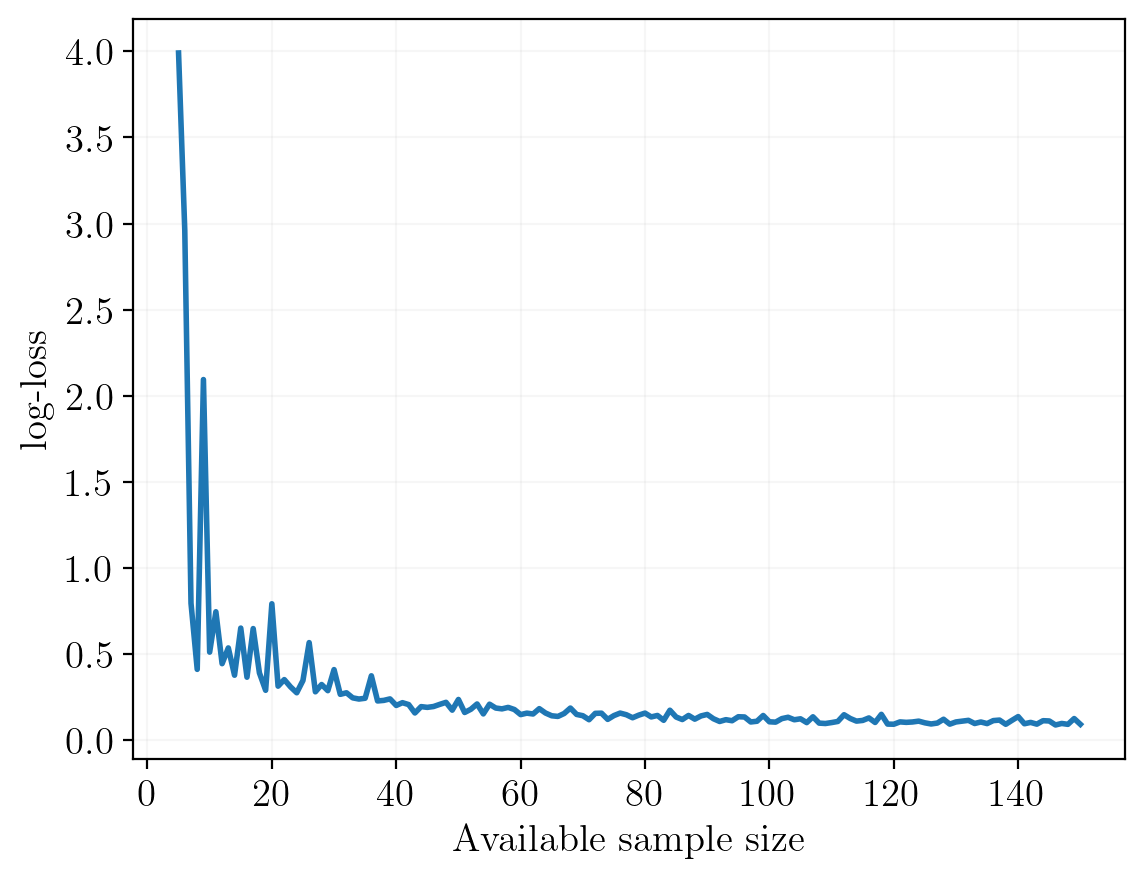

In [166]:
plt.plot(np.arange(dataset.n+1, dataset.m+1), losses)
plt.xlabel("Available sample size")
plt.ylabel("log-loss")
plt.show()